<a href="https://colab.research.google.com/github/ttury/Linear_Regression_For_Solar_Power/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [221]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

weather_2019 = pd.read_csv('./drive/MyDrive/datasets/jindo_weather_2019.csv')
sun_2019 = pd.read_csv('./drive/MyDrive/datasets/jindo_sun_2019.csv')
weather_2020 = pd.read_csv('./drive/MyDrive/datasets/jindo_weather_2020.csv')
sun_2020 = pd.read_csv('./drive/MyDrive/datasets/jindo_sun_2020.csv')

weather_dataset = pd.concat([weather_2019, weather_2020])
sun_dataset = pd.concat([sun_2019, sun_2020])

x = [[value] for value in weather_dataset.values[:, 7].astype(np.float)]
y = [[value] for value in sun_dataset.values[:, 28].astype(np.float) / 1000000]

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2)
# x_train, y_train, x_val, y_val = train_test_split(x_train_all, y_train_all, test_size = 0.2)

In [219]:
class SingleLayer:

  def __init__(self, learning_rate = 0.1, l1 = 0, l2 = 0):
    self.w = None
    self.b = None
    self.losses = []
    self.val_losses = []
    self.learning_rate = learning_rate # 학습률 : 하이퍼마라미터, 가중치의 업데이트 양 조절
    self.w_history = list() # 가중치의 변화 과정 저장
    self.l1 = l1
    self.l2 = l2

  def forpass(self, x_i):
    z = np.sum(self.w * x_i) + self.b # 하나의 값
    return z

  def backprop(self, x_i, err):
    w_grad = x_i * err # 다차원 벡터
    b_grad = 1 * err # 하나의 값
    return w_grad, b_grad

  def fit(self, x, y, epochs=100, x_val = None, y_val = None):
    self.w = np.ones(1) # 원래는 x.shape[1]을 써야 하지만 1개의 특성만 사용해서 이렇게 표현
    self.b = 0
    self.w_history.append(self.w.copy()) # ndarray를 복사할때 = 사용 x, copy 함수 사용

    for _ in range(epochs):
      loss = 0
      indexes = np.random.permutation(np.arange(len(x)))
      '''
      에포크마다 훈련 세트를 무작위로 섞어 손실 함수의 값을 줄임
      arrange 함수 : 0 부터 len(x) - 1까지 1씩 커지는 array 생성
      permutation 함수 : array를 무작위로 섞음(실제 array 값에는 변화 없음)
      '''

      for i in indexes:
        z = self.forpass(x[i])
        err = -(y[i] - z)
        w_grad, b_grad = self.backprop(x[i], err)
        w_grad += self.l1 * np.sign(self.w) + self.l2 * self.w
        self.w -= w_grad * self.learning_rate
        self.b -= b_grad
        loss += ((y[i] - z) ** 2)

      self.losses.append(loss / len(y) + self.reg_loss())
      self.update_val_loss(x_val, y_val)

  def update_val_loss(self, x_val, y_val):
    if x_val is None:
      return
    val_loss = 0
    for i in range(len(x_val)):
      z = self.forpass(x_val[i])
      val_loss += ((y_val[i] - z) ** 2)
    self.val_losses.append(val_loss/len(y_val) + self.reg_loss())

  def reg_loss(self):
    return self.l1 * np.sum(np.abs(self.w)) + self.l2 / 2 * np.sum(self.w ** 2)

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x] # 다차원 벡터
    return z
    
  def score(self, x, y):
    z = self.predict(x)
    RSS = ((y - z) ** 2).sum()
    TSS = ((y - y.mean()) ** 2).sum()
    return 1 - RSS / TSS

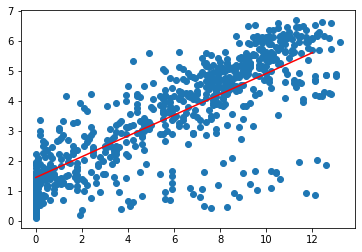

0.6711424047737213


In [242]:
from matplotlib import pyplot as plt

layer = SingleLayer(learning_rate = 0.001, l1 = 0.001, l2 = 0.001)
layer.fit(x_train, y_train)

plt.scatter(x, y)
pos_1 = [0.0, layer.w * 0 + layer.b]
pos_2 = [12.0, layer.w * 12 + layer.b]
plt.plot([pos_1[0], pos_2[0]], [pos_1[1], pos_2[1]], 'r')
plt.show()

print(layer.score(x, y))

[0.36827066]


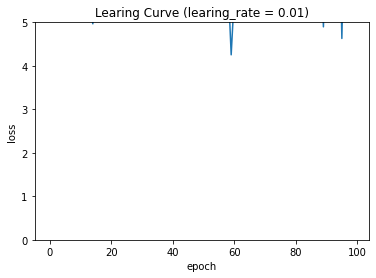

[0.34183088]


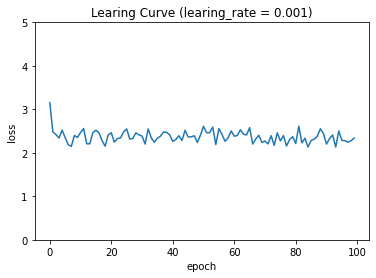

[0.37527795]


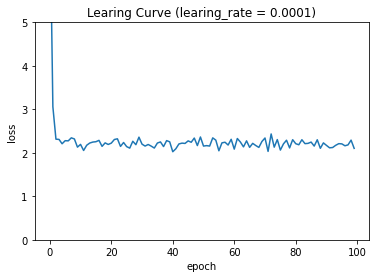

[0.37107248]


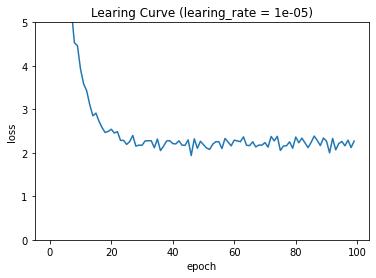

[0.61029274]


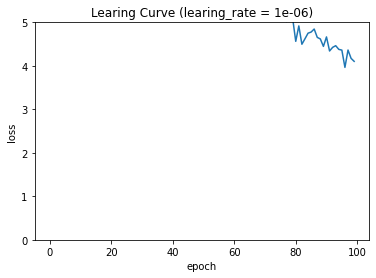

In [225]:
lr_list = [0.01, 0.001, 0.0001, 0.00001, 0.000001]

for lr in lr_list:
  lyr = SingleLayer(learning_rate = lr)
  lyr.fit(x_train, y_train, x_val=x_val, y_val=y_val)
  print(lyr.w)

  plt.plot(lyr.losses)
  plt.title('Learing Curve (learing_rate = {})'.format(lr))
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.ylim(0, 5)
  plt.show()

In [ ]:
l1_list = [0.01, 0.001, 0.0001, 0.00001, 0.000001]

for l1 in l1_list:
  lyr = SingleLayer(learning_rate = 0.001, l1 = l1)
  lyr.fit(x_train, y_train, x_val=x_val, y_val=y_val)

  plt.plot(lyr.losses)
  plt.title('Learing Curve (l1 = {})'.format(l1))
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.ylim(0, 5)
  plt.show()

In [ ]:
l2_list = [0.01, 0.001, 0.0001, 0.00001, 0.000001]

for l2 in l2_list:
  lyr = SingleLayer(learning_rate = 0.001, l1 = 0.01, l2 = l2)
  lyr.fit(x_train, y_train, x_val=x_val, y_val=y_val)

  plt.plot(lyr.losses)
  plt.title('Learing Curve (l2 = {})'.format(l2))
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.ylim(0, 5)
  plt.show()

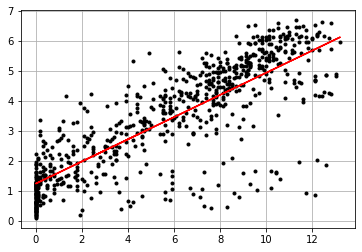

0.694804759776901


In [211]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()
model.fit(X = x_train, y = y_train)  

plt.plot(x, y, 'k.')
plt.grid(True)
plt.plot(x_val, model.predict(x_val), color = 'r')
plt.show()
print(model.score(x_val, y_val))